# Simulating electron - proton collisions 

### Day-4 : Last day - 



In [1]:
# Importing useful headers
import pythia8
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Initialize the pythia object and setup the type of collisions 

In [2]:
pythia = pythia8.Pythia()
#Set up incoming beams, for frame with unequal beam energies.
pythia.readString("Beams:frameType = 2")


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.307      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 25 Feb 2022  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 12 Jun 2023 at 08:45:22    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

True

https://pythia.org/.                         |  | 
 |  |   Problems or bugs should be reported on email at authors@pythia.org.        |  | 
 |  |                                                                              |  | 
 |  |   The main program reference is 'An Introduction to PYTHIA 8.2',             |  | 
 |  |   T. Sjöstrand et al, Comput. Phys. Commun. 191 (2015) 159                   |  | 
 |  |   [arXiv:1410.3012 [hep-ph]]                                                 |  | 
 |  |                                                                              |  | 
 |  |   The main physics reference is the 'PYTHIA 6.4 Physics and Manual',         |  | 
 |  |   T. Sjöstrand, S. Mrenna and P. Skands, JHEP05 (2006) 026 [hep-ph/0603175]  |  | 
 |  |                                                                              |  | 
 |  |   PYTHIA is released under the GNU General Public Licence version 2 or later.|  | 
 |  |   Please respect the MCnet Guidelines for Event Gener

In [3]:
# Set the proton energy - 
pEnergy = 920
#BeamA = proton.
pythia.readString("Beams:idA = 2212")
pythia.settings.parm("Beams:eA", pEnergy)

In [4]:
# Set the electron energy - 
eEnergy = 500
#BeamB = electron.
pythia.readString("Beams:idB = 11")
pythia.settings.parm("Beams:eB", eEnergy)

In [5]:
#Set up DIS process within some phase space.
#Neutral current (with gamma/Z interference).
pythia.readString("WeakBosonExchange:ff2ff(t:gmZ) = on")

#Phase-space cut: minimal Q2 of process.
pythia.settings.parm("PhaseSpace:Q2Min", 25)

#Set dipole recoil on. Necessary for DIS + shower.
pythia.readString("SpaceShower:dipoleRecoil = on")

#Allow emissions up to the kinematical limit,
#since rate known to match well to matrix elements everywhere.
pythia.readString("SpaceShower:pTmaxMatch = 2")

#QED radiation off lepton not handled yet by the new procedure.
pythia.readString("PDF:lepton = off")
pythia.readString("TimeShower:QEDshowerByL = off")

pythia.init()


 *-------  PYTHIA Process Initialization  --------------------------*
 |                                                                  |
 | We collide p+ with e- at a CM energy of 1.356e+03 GeV            |
 |                                                                  |
 |------------------------------------------------------------------|
 |                                                    |             |
 | Subprocess                                    Code |   Estimated |
 |                                                    |    max (mb) |
 |                                                    |             |
 |------------------------------------------------------------------|
 |                                                    |             |
 | f f' -> f f' (t-channel gamma*/Z0)             211 |   3.797e-04 |
 |                                                                  |
 *-------  End PYTHIA Process Initialization -----------------------*

 *-------  PYTHIA 

True

----------------------
 
      id   name            antiName         spn chg col      m0        mWidth      mMin       mMax       tau0    res dec ext vis wid
             no onMode   bRatio   meMode     products 

 no particle data has been changed from its default value 

 --------  End PYTHIA Particle Data Table  -----------------------------------------------------------------------------------------



In [6]:
Number_of_events = 10

In [7]:
part_pt = []
part_eta = []
part_theta = []
part_phi = []
part_E = []
part_p = []
part_m = []
part_id = []
part_q = []

for iEvent in range(0, Number_of_events):
    if not pythia.next():
        continue
    for particle in pythia.event:
    #if 1:
        if particle.isFinal():
            pT = float('%.3g' % particle.pT())
            part_pt.append(pT)
            eta = float('%.3g' % particle.eta())
            part_eta.append(eta)
            theta = float('%.3g' % particle.theta())
            part_theta.append(theta)
            phi = float('%.3g' % particle.phi())
            part_phi.append(phi)
            E = float('%.3g' % particle.e())
            part_E.append(E)
            p = float('%.3g' % particle.pAbs())
            part_p.append(p)
            mass = float('%.3g' % particle.m())
            part_m.append(mass)
            part_id.append(particle.id())
            q = particle.charge()
            part_q.append(q)
            print(particle.id(), pT, eta, theta, phi, E, p, mass, q)

part_pt = np.array(part_pt)
part_phi = np.array(part_phi)
part_eta = np.array(part_eta)
part_theta = np.array(part_theta)
part_E = np.array(part_E)
part_p = np.array(part_p)
part_m = np.array(part_m)
part_id = np.array(part_id)
part_q = np.array(part_q)
particles = np.vstack((part_id, part_pt, part_phi, part_eta, part_theta, part_E, part_p, part_m, part_q)).T

11 8.64 -4.69 3.12 0.884 470.0 470.0 0.000511 -1.0
211 0.163 5.8 0.00603 -1.97 27.1 27.1 0.14 1.0
-211 0.527 7.69 0.000913 2.27 577.0 577.0 0.14 -1.0
211 0.388 6.48 0.00308 0.942 126.0 126.0 0.14 1.0
-211 0.267 5.79 0.00612 0.626 43.7 43.7 0.14 -1.0
211 0.712 4.36 0.0255 -0.978 27.9 27.9 0.14 1.0
-211 0.187 4.38 0.025 1.35 7.47 7.47 0.14 -1.0
211 0.21 4.24 0.0289 0.571 7.26 7.26 0.14 1.0
-211 0.531 -1.05 2.47 -0.9 0.86 0.849 0.14 -1.0
211 0.346 0.0678 1.5 -0.301 0.374 0.347 0.14 1.0
-211 2.42 -1.9 2.85 -2.09 8.28 8.28 0.14 -1.0
321 6.31 -1.84 2.83 -2.25 20.4 20.4 0.494 1.0
211 0.235 4.04 0.0353 -0.00341 6.66 6.66 0.14 1.0
-211 0.469 3.67 0.051 -3.14 9.21 9.21 0.14 -1.0
2112 0.234 3.19 0.0822 1.25 3.0 2.85 0.94 0.0
-2112 0.578 0.879 0.787 2.94 1.25 0.817 0.94 0.0
2112 0.487 5.53 0.00794 1.24 61.4 61.4 0.94 0.0
22 0.129 1.8 0.329 -3.03 0.401 0.401 0.0 0.0
22 0.217 2.58 0.152 -3.12 1.44 1.44 0.0 0.0
22 0.039 0.381 1.2 0.572 0.0419 0.0419 0.0 0.0
22 0.137 1.31 0.525 -1.24 0.274 0.274 0.0 0

    17        211  pi+                 83    11    12     0     0     0     0      0.398     -0.591     27.939     27.948      0.140
    18       -211  pi-                 83    11    12     0     0     0     0      0.042      0.182      7.467      7.470      0.140
    19        113  (rho0)             -83    11    12    28    29     0     0     -0.234     -0.004     15.853     15.872      0.733
    20        211  pi+                 83    11    12     0     0     0     0      0.176      0.113      7.258      7.262      0.140
    21       2114  (Delta0)           -84    11    12    30    31     0     0     -0.271      0.203      4.640      4.839      1.329
    22      -2114  (Deltabar0)        -84    11    12    32    33     0     0     -0.489      0.006      0.829      1.561      1.229
    23       -211  pi-                 84    11    12     0     0     0     0      0.330     -0.416     -0.663      0.860      0.140
    24        211  pi+                 84    11    12     0     0    

#### Worksheet to guide the structured tutorial, varying the setup - to build intuition 
what did we start with, and what did we change, and what did we see - learning objectives for the day 
something to guide the activities 
connect to big picture of why it matters 
### where did we get this simulation from? is this just random or what are these numbers 
#### dice rolls 

In [8]:
Event_Particles = pd.DataFrame(particles, columns=['ID','pT','phi','eta','theta','Energy', 'momentum','mass','q'])
Event_Particles

,ID,pT,phi,eta,theta,Energy,momentum,mass,q
0,11.0,8.6400,0.884,-4.690,3.120000,470.0000,470.0000,0.000511,-1.0
1,211.0,0.1630,-1.970,5.800,0.006030,27.1000,27.1000,0.140000,1.0
2,-211.0,0.5270,2.270,7.690,0.000913,577.0000,577.0000,0.140000,-1.0
3,211.0,0.3880,0.942,6.480,0.003080,126.0000,126.0000,0.140000,1.0
4,-211.0,0.2670,0.626,5.790,0.006120,43.7000,43.7000,0.140000,-1.0
...,...,...,...,...,...,...,...,...,...
427,22.0,0.1930,-1.210,-1.600,2.740000,0.5000,0.5000,0.000000,0.0
428,22.0,0.0241,0.813,-2.580,2.990000,0.1600,0.1600,0.000000,0.0
429,2112.0,0.1580,2.280,0.710,0.914000,0.9600,0.1990,0.940000,0.0
430,22.0,0.0737,1.330,-1.230,2.570000,0.1370,0.1370,0.000000,0.0


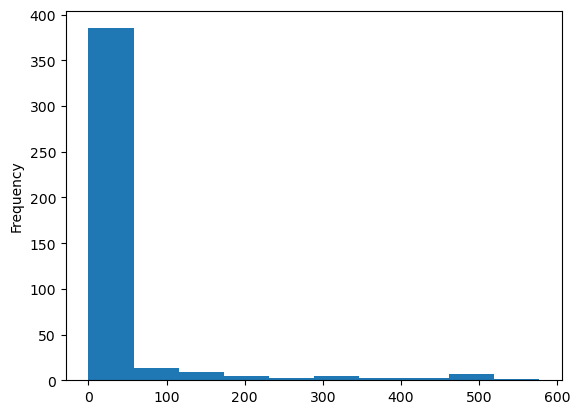

In [9]:
Event_Particles['Energy'].plot.hist()
plt.show()

In [10]:
def fastsmear(df):

    part_pt = np.asarray(df['pT'])
    part_eta = np.asarray(df['eta'])
    part_theta = np.asarray(df['theta'])
    part_phi = np.asarray(df['phi'])
    part_E = np.asarray(df['Energy'])
    part_p = np.asarray(df['momentum'])
    part_m = np.asarray(df['mass'])
    part_id = np.asarray(df['ID']).astype(int)
    part_q = np.asarray(df['q'])

    part_pt_new = []
    part_E_new = []
    part_p_new = []
    part_m_new = []
    part_phi_new = []
    part_eta_new = []
    part_theta_new = []
    part_id_new = []
    part_q_new = []
    
    for i in range(0, len(part_pt)):

        if (part_q[i] == 0): # neutral particle
            E = part_E[i]
            E_new = (1+np.random.normal(loc=0, scale=0.4/np.sqrt(E)))*E
            ratio = E_new / E
            part_E_new.append(E_new)
            part_pt_new.append(ratio*part_pt[i])
            part_p_new.append(ratio*part_p[i])
            part_m_new.append(part_m[i])
            part_phi_new.append(part_phi[i])
            part_eta_new.append(part_eta[i])
            part_theta_new.append(part_theta[i])
            part_id_new.append(part_id[i])
            part_q_new.append(part_q[i])
        else: # charged particle
            keep = np.random.uniform(0,1)
            if (keep < 0.9):
                pt = part_pt[i]
                pt_new = (1+np.random.normal(loc=0, scale=0.01*pt))*pt
                ratio = pt_new / pt
                part_pt_new.append(pt_new)
                part_p_new.append(ratio*part_p[i])
                part_E_new.append(np.sqrt((ratio*part_p[i])**2+part_m[i]**2))
                part_m_new.append(part_m[i])
                part_phi_new.append(part_phi[i])
                part_eta_new.append(part_eta[i])
                part_theta_new.append(part_theta[i])
                part_id_new.append(part_id[i])
                part_q_new.append(part_q[i])
            else:
                part_pt_new.append(-9)
                part_p_new.append(-9)
                part_E_new.append(-9)
                part_m_new.append(-9)
                part_phi_new.append(-9)
                part_eta_new.append(-9)
                part_theta_new.append(-9)
                part_id_new.append(-9)
                part_q_new.append(-9)
                
    part_pt = np.array(part_pt_new)
    part_E = np.array(part_E_new)
    part_p = np.array(part_p_new)
    part_m = np.array(part_m_new)
    part_phi = np.array(part_phi_new)
    part_eta = np.array(part_eta_new)
    part_theta = np.array(part_theta_new)
    part_id = np.array(part_id_new)
    part_q = np.array(part_q_new)

    particles = np.vstack((part_id, part_pt, part_phi, part_eta, part_theta, part_E, part_p, part_m, part_q)).T
    Detector_Particles = pd.DataFrame(particles, columns=['ID','pT','phi','eta','theta','Energy', 'momentum','mass','q'])
    return Detector_Particles

In [11]:
Detector_Particles = fastsmear(Event_Particles)

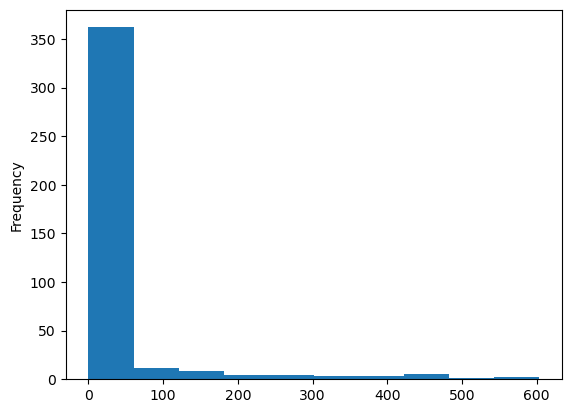

In [12]:
Detector_Particles[Detector_Particles.Energy>0]['Energy'].plot.hist()
plt.show()

Text(0, 0.5, 'Detector-level energy [GeV]')

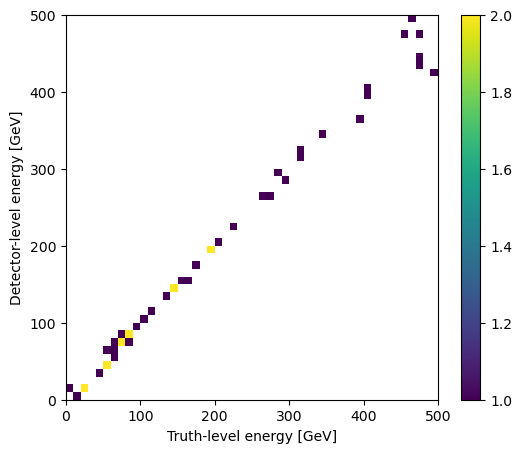

In [13]:
import matplotlib as mpl
max_e = 500
plt.figure(figsize=(6,5))
plt.hist2d(Event_Particles['Energy'], Detector_Particles['Energy'], bins=((int)(max_e/10), (int)(max_e/10)), range=((0,max_e),(0,max_e)), cmin=1, cmax=3)
plt.colorbar()
plt.xlabel('Truth-level energy [GeV]')
plt.ylabel('Detector-level energy [GeV]')

In [14]:
print("Average truth-level event multiplicity:", Event_Particles.shape[0]/Number_of_events)
print("Average detector-level event multiplicity:", Detector_Particles[Detector_Particles.Energy>0].shape[0]/Number_of_events)

Average truth-level event multiplicity: 43.2
Average detector-level event multiplicity: 40.5


In [15]:
Number_of_events = 10

delphi = []
deleta = []
scattered_pT = []
photon_pT = []

# Begin event loop. Generate event. Skip if error.
for iEvent in range(0, Number_of_events):
    if not pythia.next():
        continue
    proton = pythia.event[1].p()
    electron_in = pythia.event[4].p()
    electron_out = pythia.event[6].p()
    photon = electron_in - electron_out
    deta = photon.eta()
    dphi = photon.phi()
    if dphi > 3.1415:
        dphi = 6.2832 - dphi    
    delphi.append(dphi)
    deleta.append(deta)
    scattered_pT.append(electron_out.pT())
    photon_pT.append(photon.pT())

delphi = np.array(delphi)
deleta = np.array(deleta)
scattered_pT = np.array(scattered_pT)
photon_pT = np.array(photon_pT)
# End of event loop. Statistics. Histogram. Done.
pythia.stat()



 *-------  PYTHIA Event and Cross Section Statistics  -------------------------------------------------------------*
 |                                                                                                                 |
 | Subprocess                                    Code |            Number of events       |      sigma +- delta    |
 |                                                    |       Tried   Selected   Accepted |     (estimated) (mb)   |
 |                                                    |                                   |                        |
 |-----------------------------------------------------------------------------------------------------------------|
 |                                                    |                                   |                        |
 | f f' -> f f' (t-channel gamma*/Z0)             211 |          91         20         20 |   9.936e-05  1.164e-05 |
 |                                                    |        

(array([1., 0., 1., 1., 1., 2., 1., 0., 1., 2.]),
 array([-4.67308681, -4.21556263, -3.75803846, -3.30051428, -2.84299011,
        -2.38546593, -1.92794176, -1.47041758, -1.01289341, -0.55536923,
        -0.09784506]),
 <BarContainer object of 10 artists>)

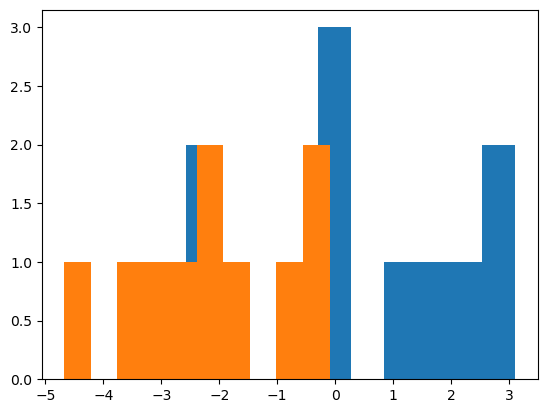

In [16]:
plt.hist(delphi, bins=10)
plt.hist(deleta, bins=10)

(array([8., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 4.9841866 ,  6.38996782,  7.79574903,  9.20153024, 10.60731146,
        12.01309267, 13.41887388, 14.8246551 , 16.23043631, 17.63621752,
        19.04199873]),
 <BarContainer object of 10 artists>)

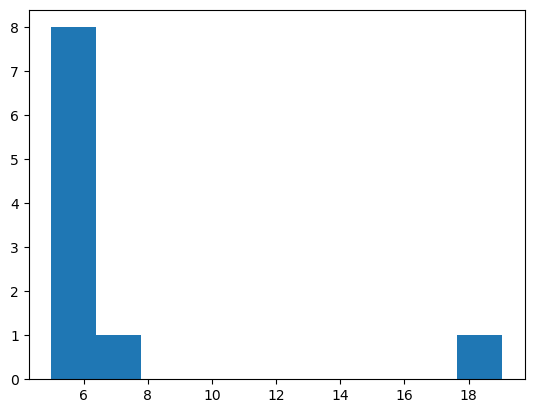

In [17]:
#plt.hist(scattered_pT)
plt.hist(photon_pT)

(array([8., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 4.9841866 ,  6.38996782,  7.79574903,  9.20153024, 10.60731146,
        12.01309267, 13.41887388, 14.8246551 , 16.23043631, 17.63621752,
        19.04199873]),
 <BarContainer object of 10 artists>)

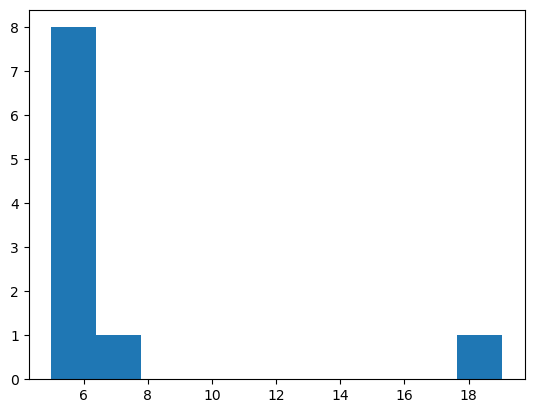

In [18]:
plt.hist(scattered_pT)

In [19]:
# check struck quark index in pythia event
counter = 0
for particle in pythia.event:
    if (particle.status() == -23 and particle.id() != 11):
        print(counter)
    counter += 1

5


In [20]:
electron_in = pythia.event[4].p() # 4 vector
electron_out = pythia.event[6].p()
photon = electron_in - electron_out
quark = pythia.event[5].p()

In [21]:
photon.m2Calc() # check Q2

-33.39644933734786

In [22]:
radii = [0, 100, 200, 300, 400, 500, 600]
r_labels = ['$0$','$100$','$200$','$300$','$400$','$500$','$600$']
angles = [0, 2.09858297, 5.70047087, 15.4146268, 40.3950626, 90, 139.604937421, 164.585373193, 174.299529125, 177.90141703, 180]
eta_labels=['','','3','2','1','0','-1','-2','-3','','']
nr = 600
ntheta = 90

470.0


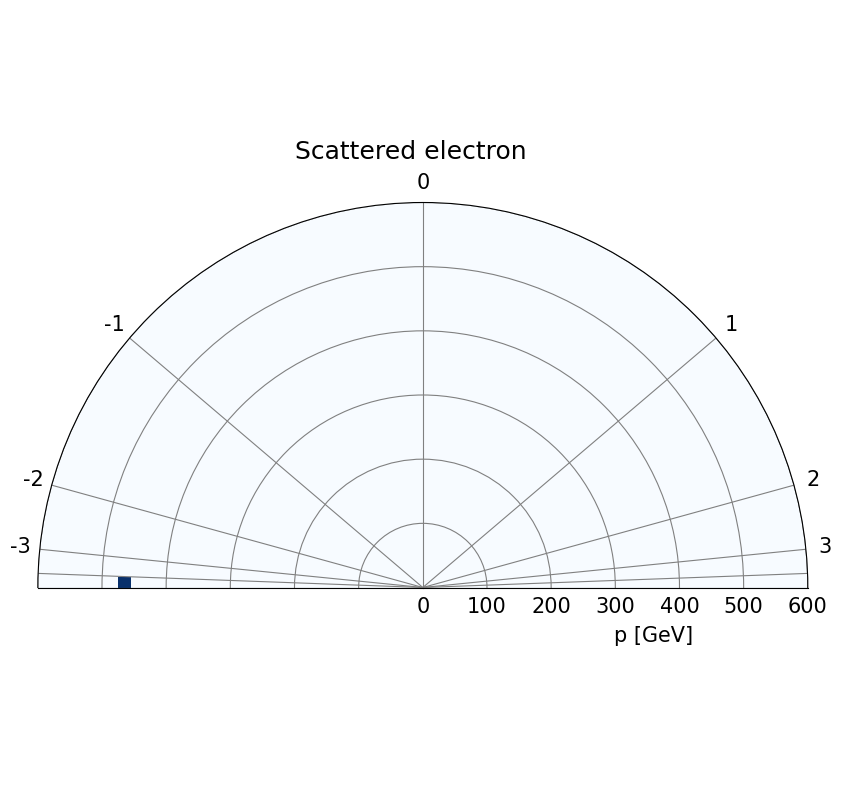

In [23]:
fig = plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = '15'

ax1 = fig.add_subplot(111, polar=True)

r_edges = np.linspace(0, nr, 30)
theta_edges = np.linspace(0, np.pi, ntheta + 1)
H_e = plt.hist2d([Event_Particles.iloc[0]['momentum']], [Event_Particles.iloc[0]['theta']], [r_edges, theta_edges])[0]
ax1.cla()

Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = ax1.pcolormesh(Theta, R, H_e, cmap='Blues')
ax1.set_thetagrids(angles, labels=eta_labels, fontsize=15)
ax1.set_xlabel('p [GeV]')
ax1.xaxis.set_label_coords(0.8, 0.2)
ax1.grid(color='grey')
im_e.set_clim(0,1)
ax1.set_thetamax(180)
fig.suptitle('Scattered electron', y=0.75)
print(Event_Particles.iloc[0]['momentum'])

Text(0.5, 0.75, 'Other final state particles')

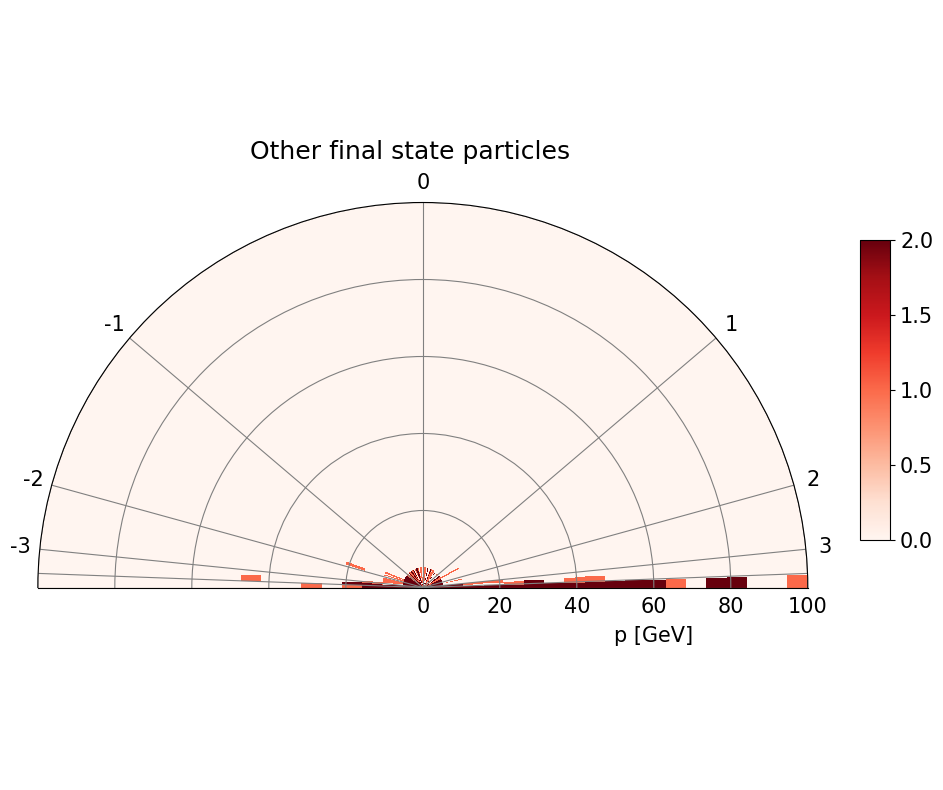

In [24]:
fig = plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = '15'

ax1 = fig.add_subplot(111, polar=True)

#r_edges = np.linspace(0, nr, 30)
r_edges = np.linspace(0, 100, 20)
theta_edges = np.linspace(0, np.pi, ntheta + 1)
H_e = plt.hist2d([Event_Particles.iloc[0]['momentum']], [Event_Particles.iloc[0]['theta']], [r_edges, theta_edges])[0]
H = plt.hist2d(Event_Particles.iloc[1:]['momentum'], Event_Particles.iloc[1:]['theta'], [r_edges, theta_edges])[0]
ax1.cla()

Theta, R = np.meshgrid(theta_edges, r_edges)
im = ax1.pcolormesh(Theta, R, H, cmap='Reds')
ax1.set_thetagrids(angles, labels=eta_labels, fontsize=15)
ax1.set_xlabel('p [GeV]')
ax1.xaxis.set_label_coords(0.8, 0.2)
ax1.grid(color='grey')
im_e.set_clim(0,1)
cbar = fig.colorbar(im, shrink=0.7, pad=0.01, cax=plt.axes([0.95, 0.35, 0.03, 0.3]))
cbar.ax.tick_params(labelsize=15)
im.set_clim(0,2)
ax1.set_thetamax(180)
fig.suptitle('Other final state particles', y=0.75)

    -5.653     0.186   -21.024    20.990 (   -5.779)

21.771223290221297 2.8787727465802964


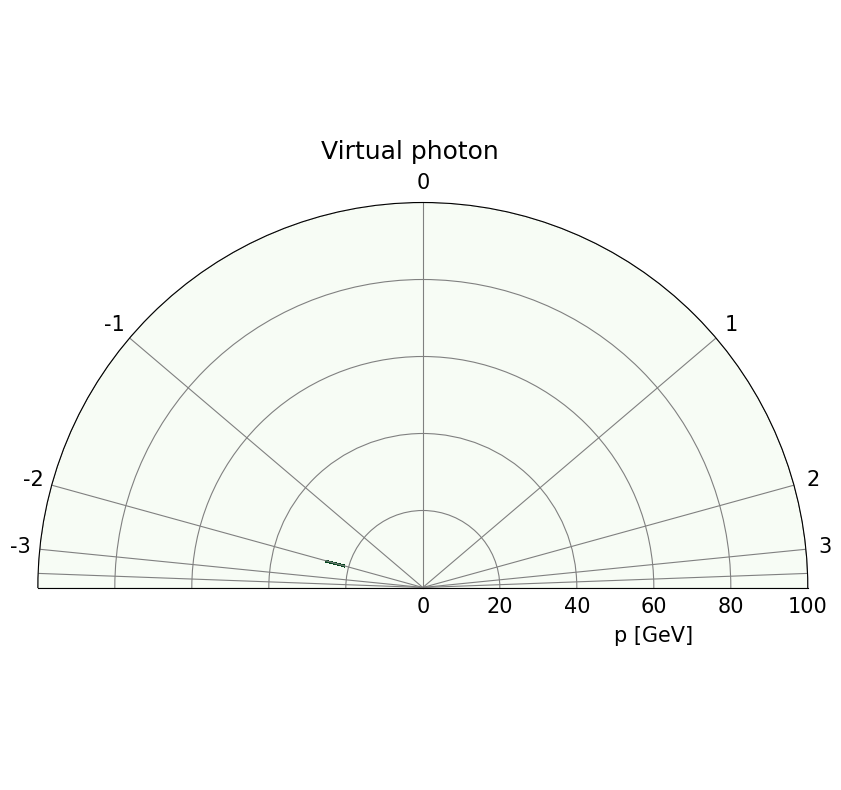

In [25]:
fig = plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = '15'

ax1 = fig.add_subplot(111, polar=True)

r_edges = np.linspace(0, 100, 20)
theta_edges = np.linspace(0, np.pi, ntheta + 1)
H_e = plt.hist2d([photon.pAbs()], [photon.theta()], [r_edges, theta_edges])[0]
ax1.cla()

Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = ax1.pcolormesh(Theta, R, H_e, cmap='Greens')
ax1.set_thetagrids(angles, labels=eta_labels, fontsize=15)
ax1.set_xlabel('p [GeV]')
ax1.xaxis.set_label_coords(0.8, 0.2)
ax1.grid(color='grey')
im_e.set_clim(0,1)
ax1.set_thetamax(180)
fig.suptitle('Virtual photon', y=0.75)

print(photon)
print(photon.pAbs(),photon.theta())

    -5.653     0.186   -20.600    21.415 (    1.500)

21.362087411402626 2.8736163144226827


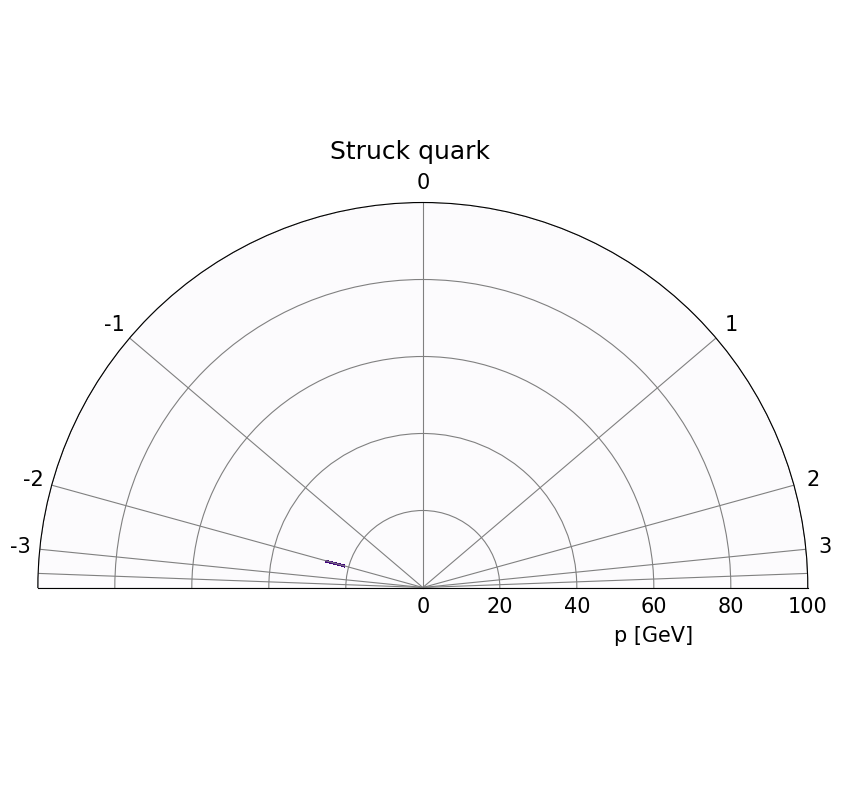

In [26]:
fig = plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = '15'

ax1 = fig.add_subplot(111, polar=True)

r_edges = np.linspace(0, 100, 20)
theta_edges = np.linspace(0, np.pi, ntheta + 1)
H_e = plt.hist2d([quark.pAbs()], [quark.theta()], [r_edges, theta_edges])[0]
ax1.cla()

Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = ax1.pcolormesh(Theta, R, H_e, cmap='Purples')
ax1.set_thetagrids(angles, labels=eta_labels, fontsize=15)
ax1.set_xlabel('p [GeV]')
ax1.xaxis.set_label_coords(0.8, 0.2)
ax1.grid(color='grey')
im_e.set_clim(0,1)
ax1.set_thetamax(180)
fig.suptitle('Struck quark', y=0.75)

print(quark)
print(quark.pAbs(),quark.theta())

In [27]:
from mpl_toolkits import mplot3d

Text(0.5, 0, '$p_T$ [GeV]')

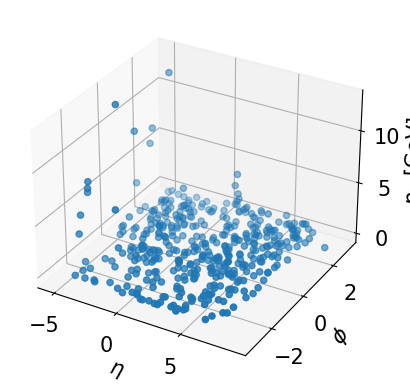

In [28]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = Event_Particles['pT']
xdata = Event_Particles['eta']
ydata = Event_Particles['phi']
ax.scatter3D(xdata, ydata, zdata)
ax.set_xlabel('$\eta$')
ax.set_ylabel('$\phi$')
ax.set_zlabel('$p_T$ [GeV]')

Text(0.5, 0, '$p_T$ [GeV]')

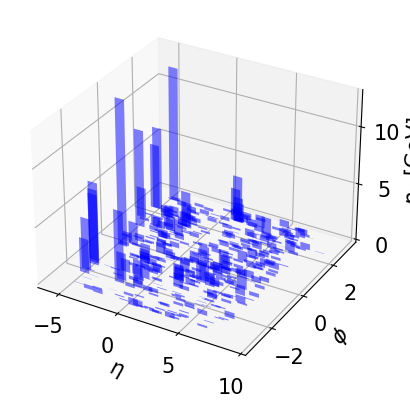

In [29]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = Event_Particles['pT']
xdata = Event_Particles['eta']
ydata = Event_Particles['phi']
for x,y,z in zip(xdata,ydata,zdata):
    ax.bar([x], [z], zs=[y], zdir='y', color='b', alpha=0.5)
ax.set_xlabel('$\eta$')
ax.set_ylabel('$\phi$')
ax.set_zlabel('$p_T$ [GeV]')

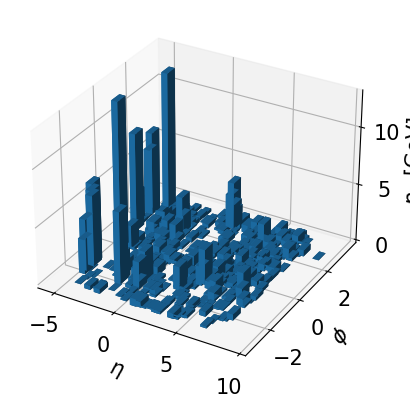

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Data for three-dimensional scattered points
zdata = Event_Particles['pT']
xdata = Event_Particles['eta']
ydata = Event_Particles['phi']
n = Event_Particles.shape[0]
ax.bar3d(xdata,ydata,np.zeros(n),np.ones(n)*0.5,np.ones(n)*0.5,zdata)
ax.set_xlabel('$\eta$')
ax.set_ylabel('$\phi$')
ax.set_zlabel('$p_T$ [GeV]')
plt.show()

In [31]:
Event_Particles.to_csv('event.csv')

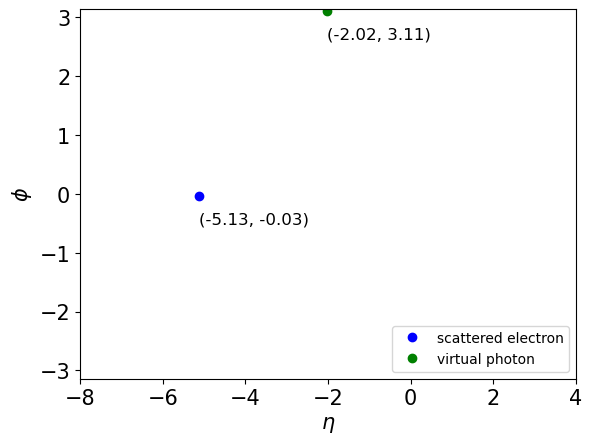

In [32]:
plt.plot(electron_out.eta(), electron_out.phi(), 'bo', label='scattered electron')
plt.plot(photon.eta(), photon.phi(), 'go', label='virtual photon')
A = [electron_out.eta(), photon.eta()]
B = [electron_out.phi(), photon.phi()]
plt.xlim(-8,4)
plt.ylim(-np.pi, np.pi)
plt.legend(fontsize=10, loc='lower right')
plt.xlabel('$\eta$')
plt.ylabel('$\phi$')
for xy in zip(A, B):
    plt.annotate('(%.2f, %.2f)' % xy, xy=xy, xytext=(0,-20), textcoords='offset points', fontsize=12)

In [33]:
print(photon.phi()-electron_out.phi())

3.1415926535897936


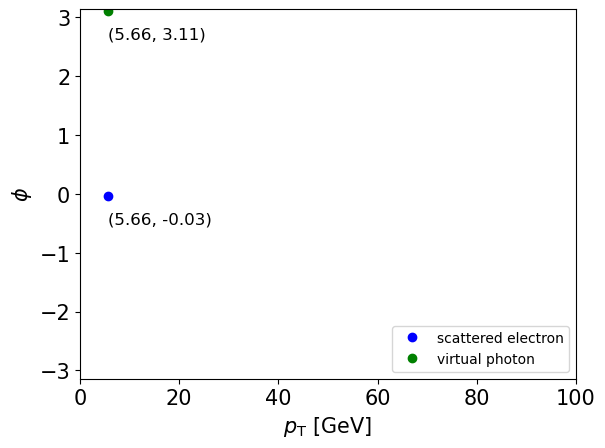

In [34]:
plt.plot(electron_out.pT(), electron_out.phi(), 'bo', label='scattered electron')
plt.plot(photon.pT(), photon.phi(), 'go', label='virtual photon')
A = [electron_out.pT(), photon.pT()]
B = [electron_out.phi(), photon.phi()]
plt.xlim(0,100)
plt.ylim(-np.pi, np.pi)
plt.legend(fontsize=10, loc='lower right')
plt.xlabel('$p_\mathrm{T}$ [GeV]')
plt.ylabel('$\phi$')
for xy in zip(A, B):
    plt.annotate('(%.2f, %.2f)' % xy, xy=xy, xytext=(0,-20), textcoords='offset points', fontsize=12)

In [35]:
delphi = []
deleta = []
scattered_pT = []
photon_pT = []
quark_pid = []

# Begin event loop. Generate event. Skip if error.
for iEvent in range(0, Number_of_events):
    if not pythia.next():
        continue
    proton = pythia.event[1].p()
    electron_in = pythia.event[4].p()
    electron_out = pythia.event[6].p()
    photon = electron_in - electron_out
    deta = photon.eta()
    dphi = photon.phi()
    if dphi > 3.1415:
        dphi = 6.2832 - dphi    
    delphi.append(dphi)
    deleta.append(deta)
    scattered_pT.append(electron_out.pT())
    photon_pT.append(photon.pT())
    quark_pid.append(pythia.event[5].id())

delphi = np.array(delphi)
deleta = np.array(deleta)
scattered_pT = np.array(scattered_pT)
photon_pT = np.array(photon_pT)
quark_pid = np.array(quark_pid)
# End of event loop. Statistics. Histogram. Done.
pythia.stat()


 *-------  PYTHIA Event and Cross Section Statistics  -------------------------------------------------------------*
 |                                                                                                                 |
 | Subprocess                                    Code |            Number of events       |      sigma +- delta    |
 |                                                    |       Tried   Selected   Accepted |     (estimated) (mb)   |
 |                                                    |                                   |                        |
 |-----------------------------------------------------------------------------------------------------------------|
 |                                                    |                                   |                        |
 | f f' -> f f' (t-channel gamma*/Z0)             211 |         137         30         30 |   8.978e-05  8.985e-06 |
 |                                                    |        

array([ 2,  2,  2, -2, -4, -4, -2,  2, -2,  2])

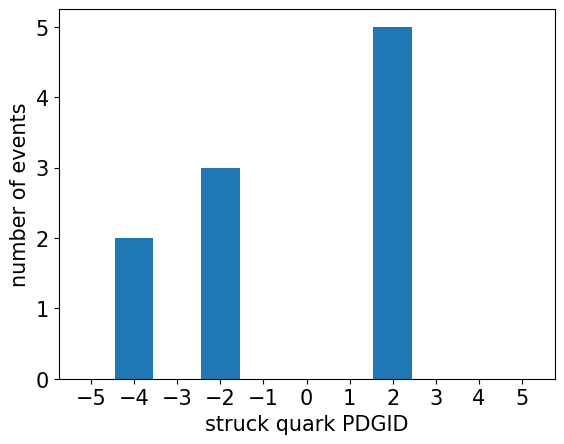

In [36]:
h = plt.hist(quark_pid, bins=np.arange(-5,7)-0.5, rwidth=0.9)
plt.xlabel('struck quark PDGID')
plt.ylabel('number of events')
plt.xticks(h[1] + 0.5)
plt.xlim(-5.75,5.75)
quark_pid